# Lading and cleaning the data

In [177]:
# load required libraries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

## Loading the survey raw data

In [178]:
data_raw = pd.read_excel("Уповноважена особа (Відповіді).xlsx", dtype="str")

In [179]:
print("The shape of the raw dataset: {}\nIt means, that there are {} responces on {} questions".format(data_raw.shape, data_raw.shape[0], data_raw.shape[1]) )

The shape of the raw dataset: (726, 25)
It means, that there are 726 responces on 25 questions


Here are the **first** two responces:

In [180]:
data_raw.head(2)

,Позначка часу,1. Хто у Вашій установі займається проведенням публічних закупівель?,"Якщо є посада уповноваженої особи, то коли приблизно її було запроваджено?",... за які категорії на рівні 2-х знаків CPV вона відповідає?,.... і які цілі ставилися при впровадженні уповноваженої особи?,... і чи були досягнуті поставлені цілі?,2. Скільки працівників залучені до проведення процедур закупівель у Вашій установі?,"3. Чи існують у Вашій організації локальні нормативно-правові акти, які регулюють кадрові питання найму на посаду закупівельника (наприклад, типові посадові інструкції)?","4. Чи виділено у Вашій установі окремий закупівельний підрозділ (наприклад, департамент закуівель, відділ, а не тендерний комітет)?",5. Чи отримують зарплатню (чи доплати) працівники за проведення процедур закупівель?,...,... допорогова (послуги),"... надпорогова (товари), окрім англ.","... надпорогова (послуги), окрім англ.","... надпорогова (роботи), окрім англ.","... надпорогова (товари), англ.","... надпорогова (послуги), англ.","... надпорогова (роботи), англ.","8. Вкажіть, будь ласка, ЄДРПОУ Вашої організації",Тут ви можете залишити додаткові коментарі:,"Вкажіть, будь ласка, ваші ім'я та e-mail (не обов'язково):"
0,2018-04-24 15:39:48.896000,тендерний комітет,nan,nan,nan,nan,5,Ні,Ні,Ні,...,14,20,20,30,45,45,45,2141710,nan,gor-osvita@ukr.net
1,2018-04-24 15:40:03.832000,тендерний комітет,nan,nan,nan,nan,5,Ні,Ні,Ні,...,nan,nan,nan,nan,nan,nan,nan,4054748,nan,"Світлана, kbctdbx@ukr.net"


Here is the **list of questions**:

In [181]:
[quest for quest in data_raw.columns]

['Позначка часу',
 '1. Хто у Вашій установі займається проведенням публічних закупівель?',
 'Якщо є посада уповноваженої особи, то коли приблизно її було запроваджено?',
 '... за які категорії на рівні 2-х знаків CPV вона відповідає?',
 '.... і які цілі ставилися при впровадженні уповноваженої особи?',
 '... і чи були досягнуті поставлені цілі?',
 '2. Скільки працівників залучені до проведення процедур закупівель у Вашій установі?',
 '3. Чи існують у Вашій організації локальні нормативно-правові акти, які регулюють кадрові питання найму на посаду закупівельника (наприклад, типові посадові інструкції)?',
 '4. Чи виділено у Вашій установі окремий закупівельний підрозділ (наприклад, департамент закуівель, відділ, а не тендерний комітет)?',
 '5. Чи отримують зарплатню (чи доплати) працівники за проведення процедур закупівель?',
 '6. Чи обов’язок проведення закупівель є додатковим навантаженням до основних посадових обов’язків?',
 '7. Вкажіть, будь ласка, СЕРЕДНЮ КІЛЬКІСТЬ РОБОЧИХ ДНІВ на п

## Cleaning and transforming the data

In [182]:
data = data_raw.replace("nan", "")

For the start, we need to rename questions into workable variable names.

In [183]:
variables=\
{'Позначка часу' : "time",
 '1. Хто у Вашій установі займається проведенням публічних закупівель?' : "resp_auth",
 'Якщо є посада уповноваженої особи, то коли приблизно її було запроваджено?' : "auth_pers_time_impl",
 '... за які категорії на рівні 2-х знаків CPV вона відповідає?' : "auth_pers_cpv",
 '.... і які цілі ставилися при впровадженні уповноваженої особи?' : "auth_pers_goals_set",
 '... і чи були досягнуті поставлені цілі?' : "auth_pers_goals_reach",
 '2. Скільки працівників залучені до проведення процедур закупівель у Вашій установі?' : "num_workers",
 '3. Чи існують у Вашій організації локальні нормативно-правові акти, які регулюють кадрові питання найму на посаду закупівельника (наприклад, типові посадові інструкції)?' : "description",
 '4. Чи виділено у Вашій установі окремий закупівельний підрозділ (наприклад, департамент закуівель, відділ, а не тендерний комітет)?' : "proc_depart",
 '5. Чи отримують зарплатню (чи доплати) працівники за проведення процедур закупівель?' : "salery",
 '6. Чи обов’язок проведення закупівель є додатковим навантаженням до основних посадових обов’язків?' : "addition_resp",
 '7. Вкажіть, будь ласка, СЕРЕДНЮ КІЛЬКІСТЬ РОБОЧИХ ДНІВ на проведення повного циклу процедури закупівлі (від моменту планування до звіту про виконання, тобто час на підготовку документації, відповіді на питання, визначення переможця, публікацію додаткових угод та інше), яку витрачає ОДИН СПІВРОБІТНИК:                 ' : "junk_var",
 '... процедура, проведена за звітом' : "time_above_report", 
 '... допорогова (товари)' : "time_below_good",
 '... допорогова (роботи)' : "time_below_work", 
 '... допорогова (послуги)' : "time_below_serv",
 '... надпорогова (товари), окрім англ.' : "time_above_good",
 '... надпорогова (послуги), окрім англ.' : "time_above_serv",
 '... надпорогова (роботи), окрім англ.' : "time_above_work",
 '... надпорогова (товари), англ.' : "time_above_eng_good", 
 '... надпорогова (послуги), англ.' : "time_above_eng_serv",
 '... надпорогова (роботи), англ.' : "time_above_eng_work",
 '8. Вкажіть, будь ласка, ЄДРПОУ Вашої організації' : "entity_code",
 'Тут ви можете залишити додаткові коментарі:' : "comments",
 "Вкажіть, будь ласка, ваші ім'я та e-mail (не обов'язково):" : "name_e-mail"
}

variables=pd.DataFrame(data=list(variables.values()), index=list(variables.keys()), columns=["new_name"])
data.columns=list(variables["new_name"])

Here is the table with old and new names:

In [184]:
variables

,new_name
Позначка часу,time
1. Хто у Вашій установі займається проведенням публічних закупівель?,resp_auth
"Якщо є посада уповноваженої особи, то коли приблизно її було запроваджено?",auth_pers_time_impl
... за які категорії на рівні 2-х знаків CPV вона відповідає?,auth_pers_cpv
.... і які цілі ставилися при впровадженні уповноваженої особи?,auth_pers_goals_set
... і чи були досягнуті поставлені цілі?,auth_pers_goals_reach
2. Скільки працівників залучені до проведення процедур закупівель у Вашій установі?,num_workers
"3. Чи існують у Вашій організації локальні нормативно-правові акти, які регулюють кадрові питання найму на посаду закупівельника (наприклад, типові посадові інструкції)?",description
"4. Чи виділено у Вашій установі окремий закупівельний підрозділ (наприклад, департамент закуівель, відділ, а не тендерний комітет)?",proc_depart
5. Чи отримують зарплатню (чи доплати) працівники за проведення процедур закупівель?,salery


After the renaming, the **first** two responces look as follows:

In [185]:
data.head(3)

,time,resp_auth,auth_pers_time_impl,auth_pers_cpv,auth_pers_goals_set,auth_pers_goals_reach,num_workers,description,proc_depart,salery,...,time_below_serv,time_above_good,time_above_serv,time_above_work,time_above_eng_good,time_above_eng_serv,time_above_eng_work,entity_code,comments,name_e-mail
0,2018-04-24 15:39:48.896000,тендерний комітет,,,,,5,Ні,Ні,Ні,...,14,20,20,30,45,45,45,2141710,,gor-osvita@ukr.net
1,2018-04-24 15:40:03.832000,тендерний комітет,,,,,5,Ні,Ні,Ні,...,,,,,,,,4054748,,"Світлана, kbctdbx@ukr.net"
2,2018-04-24 15:41:18.553000,тендерний комітет,,,,,5,Так,Ні,Так,...,,35,,,,,,2146707,,Ольга


Додаткове форматування:

In [186]:
data["auth_pers_time_impl"] = pd.to_datetime(data["auth_pers_time_impl"])

Робочий ДатаФрейм:

In [187]:
data.head(3)

,time,resp_auth,auth_pers_time_impl,auth_pers_cpv,auth_pers_goals_set,auth_pers_goals_reach,num_workers,description,proc_depart,salery,...,time_below_serv,time_above_good,time_above_serv,time_above_work,time_above_eng_good,time_above_eng_serv,time_above_eng_work,entity_code,comments,name_e-mail
0,2018-04-24 15:39:48.896000,тендерний комітет,NaT,,,,5,Ні,Ні,Ні,...,14,20,20,30,45,45,45,2141710,,gor-osvita@ukr.net
1,2018-04-24 15:40:03.832000,тендерний комітет,NaT,,,,5,Ні,Ні,Ні,...,,,,,,,,4054748,,"Світлана, kbctdbx@ukr.net"
2,2018-04-24 15:41:18.553000,тендерний комітет,NaT,,,,5,Так,Ні,Так,...,,35,,,,,,2146707,,Ольга


# Results

Here the main results of the survey are presented. The order of sections is the same as the order of questions in the survey.

## Питання 1

### 1. Хто у Вашій установі займається проведенням публічних закупівель?

In [188]:
answers_q1 = ["тендерний комітет", "уповноважена особа", "обидва варіанти"]
q_1 = pd.DataFrame(data["resp_auth"])
q_1["answ_short"]=""
q_1["answ_short"][q_1["resp_auth"].isin(answers_q1)]=q_1["resp_auth"][q_1["resp_auth"].isin(answers_q1)]
q_1["answ_short"][~q_1["resp_auth"].isin(answers_q1)]="інше"#q_1["resp_auth"][q_1["resp_auth"].isin(answers_q1)]
q_1 = pd.DataFrame(q_1["answ_short"].value_counts())
q_1["share"]=round(100*q_1["answ_short"]/sum(q_1["answ_short"]), 2)

print("Розподіл закупівельників за відповідальними за проведення закупівель:")
q_1

Розподіл закупівельників за відповідальними за проведення закупівель:


,answ_short,share
тендерний комітет,581,80.03
уповноважена особа,75,10.33
інше,38,5.23
обидва варіанти,32,4.41


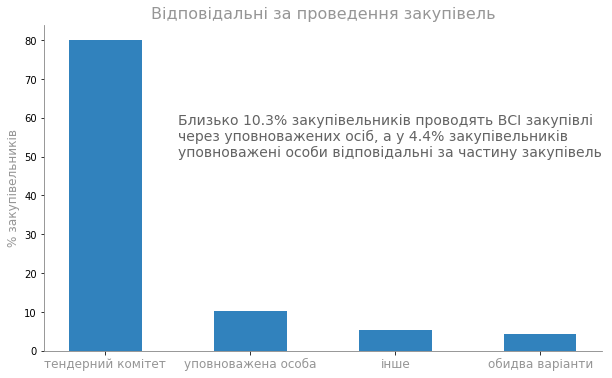

In [261]:
figure_q_1 = plt.figure(figsize=(10, 6))
ax_1 = figure_q_1.add_subplot(111)

width = 0.5      # the width of the bars
ax_1.bar(np.arange(len(q_1)), list(q_1["share"]), width, color='#3182bd')

# add some text for labels, title and axes ticks
ax_1.set_title('Відповідальні за проведення закупівель', fontsize=16, color="#969696")
ax_1.set_ylabel('% закупівельників', fontsize=12, color="#969696")
ax_1.set_xticks(np.arange(len(q_1)))
ax_1.set_xticklabels(list(q_1.index), fontsize=12, color="#969696")

ax_1.text(0.5, 50, "Близько {}% закупівельників проводять ВСІ закупівлі \nчерез уповноважених осіб, а у {}% закупівельників \nуповноважені особи відповідальні за частину закупівель"
                   .format(round(q_1.loc["уповноважена особа", "share"], 1), round(q_1.loc["обидва варіанти", "share"], 1)), 
          fontsize=14, 
          color="#636363")

ax_1.spines["left"].set_edgecolor('grey')
ax_1.spines["bottom"].set_edgecolor('grey')
ax_1.spines['right'].set_visible(False)
ax_1.spines['top'].set_visible(False)
ax_1.xaxis.set_ticks_position('bottom')
ax_1.yaxis.set_ticks_position('left')



plt.show()

### Якщо є посада уповноваженої особи, то коли приблизно її було запроваджено?	

In [199]:
q_2a = data[~np.isnat(data["auth_pers_time_impl"])]#
q_2a.set_index(q_2a["auth_pers_time_impl"], inplace=True)

In [200]:
q_2a

,time,resp_auth,auth_pers_time_impl,auth_pers_cpv,auth_pers_goals_set,auth_pers_goals_reach,num_workers,description,proc_depart,salery,...,time_below_serv,time_above_good,time_above_serv,time_above_work,time_above_eng_good,time_above_eng_serv,time_above_eng_work,entity_code,comments,name_e-mail
auth_pers_time_impl,,,,,,,,,,,,,,,,,,,,,
2016-11-09,2018-04-24 15:43:37.484000,тендерний комітет,2016-11-09,,,Так,6,Так,Ні,Ні,...,,,,,,,,38236676,,
2017-04-01,2018-04-24 15:44:43.869000,уповноважена особа,2017-04-01,30000000-9,професіоналізація закупівель,Так,5,Так,Ні,Так,...,,,,,,,,40996564,,kivgilovld@gmail.com
2016-06-01,2018-04-24 15:45:46.382000,уповноважена особа,2016-06-01,За всі,Ведення та оформлення публічних закупівель,Частково,4,Ні,Ні,Ні,...,7,-,-,-,-,-,-,24168951,,
2016-08-10,2018-04-24 15:46:57.170000,уповноважена особа,2016-08-10,За всі,Щоб оголошувати закупівлі,Так,3,Ні,Ні,Ні,...,0,15,30,0,0,35,0,не вкажу,,Микита
2016-08-01,2018-04-24 15:49:09.352000,обидва варіанти,2016-08-01,відповідає за допорогові закупівлі,,,5,Ні,Ні,Ні,...,,30,20,30,,,,2146417,,ekaterinazgonnik@yandex.ru Катерина
2016-10-10,2018-04-24 15:54:06.816000,тендерний комітет,2016-10-10,,єкономія бюджетних коштів,Частково,1,Так,Ні,Ні,...,20,,,,,,,25602303,,
2017-01-01,2018-04-24 16:01:08.738000,уповноважена особа,2017-01-01,,для введення даних в Прозоро,Так,один,Ні,Ні,Ні,...,3,,,,,,,2219895,,"Олена, kozlovskayelena@ukr.net"
2017-05-26,2018-04-24 16:01:33.045000,уповноважена особа,2017-05-26,,,Так,1 - голова правління,Ні,Ні,Ні,...,1,,,,,,,40993631,,Олена elena.kucenko@gmail.com
2017-07-01,2018-04-24 16:04:07.853000,обидва варіанти,2017-07-01,За всі закупівлі підприємства,Забезпечення організації публічних закупівель ...,Так,6,Ні,Ні,Ні,...,5,10,-,-,-,-,-,1181535,,"Дмитро, dm.bedriy@gmail.com"


Терміни впровадження уповноважених осіб:

In [201]:
q_2a = pd.DataFrame(q_2a[q_2a["auth_pers_time_impl"]>="2015-01-01"].resample("Q").count()) #["auth_pers_time_impl"])
q_2a = pd.DataFrame(q_2a["time"])
q_2a

,time
auth_pers_time_impl,
2015-03-31,1
2015-06-30,0
2015-09-30,1
2015-12-31,1
2016-03-31,2
2016-06-30,7
2016-09-30,15
2016-12-31,6
2017-03-31,9


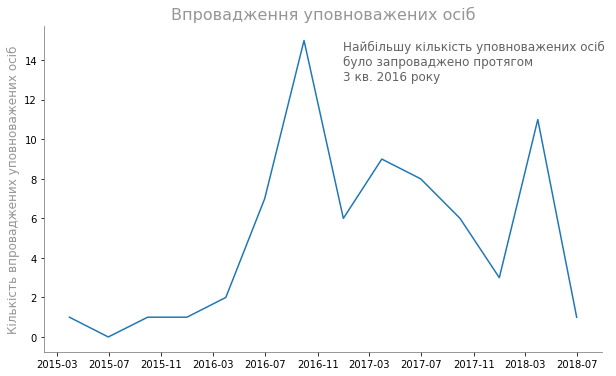

In [237]:
figure_q_2a = plt.figure(figsize=(10, 6))
ax_1 = figure_q_2a.add_subplot(111)

plt.plot(q_2a["time"])


# add some text for labels, title and axes ticks
ax_1.set_title('Впровадження уповноважених осіб', fontsize=16, color="#969696")
ax_1.set_ylabel('Кількість впроваджених уповноважених осіб', fontsize=12, color="#969696")
#ax_1.xaxis_date()

ax_1.spines["left"].set_edgecolor('grey')
ax_1.spines["bottom"].set_edgecolor('grey')
ax_1.spines['right'].set_visible(False)
ax_1.spines['top'].set_visible(False)
ax_1.xaxis.set_ticks_position('bottom')
ax_1.yaxis.set_ticks_position('left')

#ax_1.set_xticks(np.arange(len(q_2a)))
# ax_1.set_xticklabels(list(q_1.index), fontsize=12, color="#969696")

ax_1.text(q_2a["time"].idxmax()+1, max(q_2a["time"])-2, 
          "Найбільшу кількість уповноважених осіб \nбуло запроваджено протягом \n{} кв. {} року"
          .format(q_2a["time"].idxmax().quarter, q_2a["time"].idxmax().year),
          fontsize=12,
          color="#636363")
#           , "Близько {}% закупівельників проводять ВСІ закупівлі \nчерез уповноважених осіб, а у {}% закупівельників \nуповноважені особи відповідальні за частину закупівель"
#                    .format(round(q_1.loc["уповноважена особа", "share"], 1), round(q_1.loc["обидва варіанти", "share"], 1)), 
#           fontsize=14, 
#           color="#636363")

plt.show()

### ... за які категорії на рівні 2-х знаків CPV вона відповідає? (NOT FINISHED!!)

In [240]:
q_2b = data[data["auth_pers_cpv"]!=""]

In [241]:
pd.DataFrame(q_2b["auth_pers_cpv"].value_counts())

,auth_pers_cpv
всі,8
за всі,3
За всі,3
допорогові закупівлі,2
відповідає за допорогові закупівлі,2
посада уповноваженої особи відсутня,1
"У нашій установі ще з серпня 2016 року працює уповноважена особа, але в штат вона введена на іншу посад з покладанням обовязків уповноваженої особи, оскільки на сьогоднішній день й досі не введено в класифікатор професій (посад) уповноважених з питань публічних закупівель.",1
проведення тендеру в повному обсязі,1
Згідно Річного плану закупівель,1
Уповноважені особі відповідають за допорогові закупівлі,1


### ... і які цілі ставилися при впровадженні уповноваженої особи? (NOT FINISHED!!)

In [247]:
q_2c = data[data["auth_pers_goals_set"]!=""]

In [254]:

q_2c = pd.DataFrame(data["auth_pers_goals_set"][data["auth_pers_goals_set"]!=""].value_counts())
q_2c["share"]=round(100*q_2c["auth_pers_goals_set"]/sum(q_2c["auth_pers_goals_set"]), 2)

print("Розподіл закупівельників за цілями, які ставились перед запровадженням уповноваженої особи:")
q_2c

Розподіл закупівельників за цілями, які ставились перед запровадженням уповноваженої особи:


,auth_pers_goals_set,share
проведення тендерних закупівель,2,3.03
-,2,3.03
проведення закупівель,2,3.03
Проведення допорогових закупівель,2,3.03
Закупівля,2,3.03
проведення допорогових закупівель,2,3.03
Спрощення процедури організації закупівель,1,1.52
Щоб оголошувати закупівлі,1,1.52
проводити закупівлі через систему,1,1.52
"проведення процедур закупівлі,планування закупівель",1,1.52


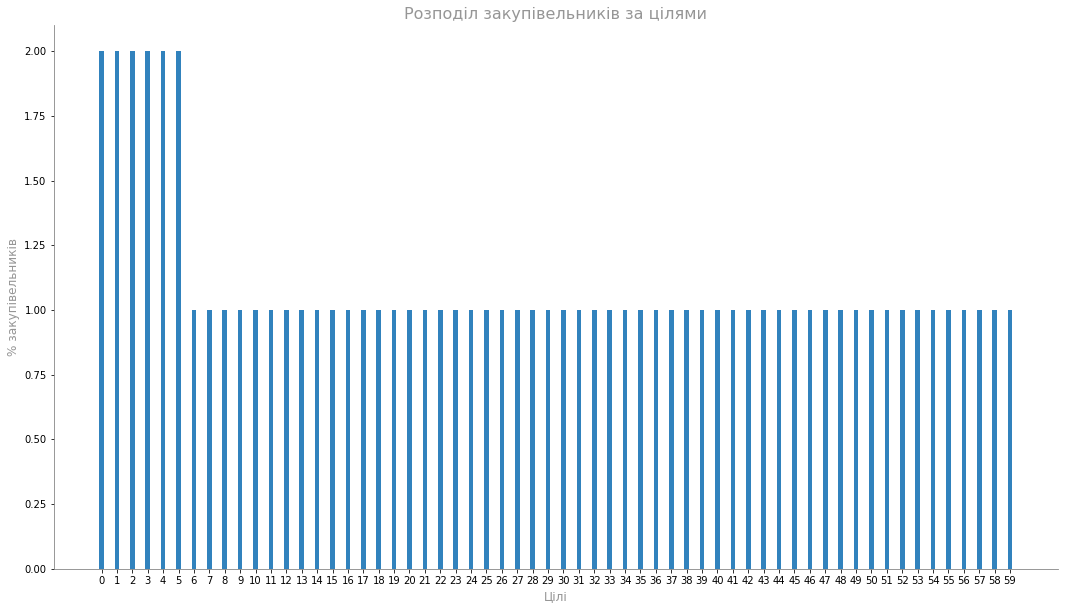

In [264]:
figure_q_2c = plt.figure(figsize=(18, 10))
ax_1 = figure_q_2c.add_subplot(111)

width = 0.3      # the width of the bars
ax_1.bar(np.arange(len(q_2c)), list(q_2c["auth_pers_goals_set"]), width, color='#3182bd')

# add some text for labels, title and axes ticks
ax_1.set_title('Розподіл закупівельників за цілями', fontsize=16, color="#969696")
ax_1.set_ylabel('% закупівельників', fontsize=12, color="#969696")
ax_1.set_xlabel('Цілі', fontsize=12, color="#969696")
ax_1.set_xticks(np.arange(len(q_2c)))
#ax_1.set_xticklabels(list(q_2c.index), fontsize=12, color="#969696")

# ax_1.text(0.5, 50, "Близько {}% закупівельників проводять ВСІ закупівлі \nчерез уповноважених осіб, а у {}% закупівельників \nуповноважені особи відповідальні за частину закупівель"
#                    .format(round(q_1.loc["уповноважена особа", "share"], 1), round(q_1.loc["обидва варіанти", "share"], 1)), 
#           fontsize=14, 
#           color="#636363")

ax_1.spines["left"].set_edgecolor('grey')
ax_1.spines["bottom"].set_edgecolor('grey')
ax_1.spines['right'].set_visible(False)
ax_1.spines['top'].set_visible(False)
ax_1.xaxis.set_ticks_position('bottom')
ax_1.yaxis.set_ticks_position('left')

plt.show()

### ... і чи були досягнуті поставлені цілі? (NOT FINISHED!!)

In [280]:
q_2d = pd.DataFrame(data["auth_pers_goals_reach"][data["auth_pers_goals_reach"]!=""])

In [281]:
answers_q_2d = ["Так", "Частково", "Ні"]
q_2d["answ_short"]=""
q_2d["answ_short"][q_2d["auth_pers_goals_reach"].isin(answers_q_2d)]=q_2d["auth_pers_goals_reach"][q_2d["auth_pers_goals_reach"].isin(answers_q_2d)]
q_2d["answ_short"][~q_2d["auth_pers_goals_reach"].isin(answers_q_2d)]="інше"
q_2d = pd.DataFrame(q_2d["answ_short"].value_counts())
q_2d["share"]=round(100*q_2d["answ_short"]/sum(q_2d["answ_short"]), 2)

print("Розподіл закупівельників за тим, чи було досягнуто цілі:")
q_2d

Розподіл закупівельників за тим, чи було досягнуто цілі:


,answ_short,share
Так,77,63.11
Частково,31,25.41
Ні,8,6.56
інше,6,4.92


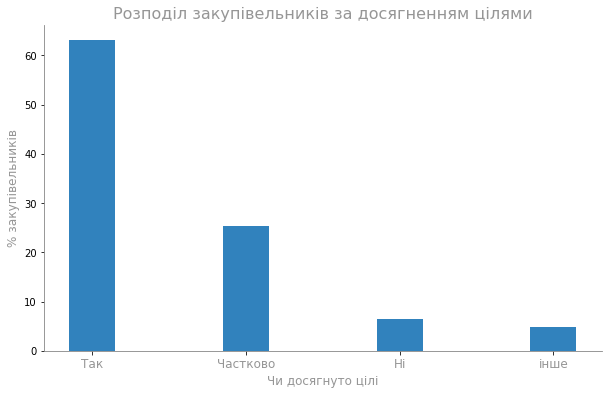

In [286]:
figure_q_2d = plt.figure(figsize=(10, 6))
ax_1 = figure_q_2d.add_subplot(111)

width = 0.3      # the width of the bars
ax_1.bar(np.arange(len(q_2d)), list(q_2d["share"]), width, color='#3182bd')

# add some text for labels, title and axes ticks
ax_1.set_title('Розподіл закупівельників за досягненням цілями', fontsize=16, color="#969696")
ax_1.set_ylabel('% закупівельників', fontsize=12, color="#969696")
ax_1.set_xlabel('Чи досягнуто цілі', fontsize=12, color="#969696")
ax_1.set_xticks(np.arange(len(q_2d)))
ax_1.set_xticklabels(list(q_2d.index), fontsize=12, color="#969696")

# ax_1.text(0.5, 50, "Близько {}% закупівельників проводять ВСІ закупівлі \nчерез уповноважених осіб, а у {}% закупівельників \nуповноважені особи відповідальні за частину закупівель"
#                    .format(round(q_1.loc["уповноважена особа", "share"], 1), round(q_1.loc["обидва варіанти", "share"], 1)), 
#           fontsize=14, 
#           color="#636363")

ax_1.spines["left"].set_edgecolor('grey')
ax_1.spines["bottom"].set_edgecolor('grey')
ax_1.spines['right'].set_visible(False)
ax_1.spines['top'].set_visible(False)
ax_1.xaxis.set_ticks_position('bottom')
ax_1.yaxis.set_ticks_position('left')

plt.show()

## Питання 2

In [64]:
for column in data.columns[1:]:
    print(pd.DataFrame(data[column].value_counts()))

                                                    resp_auth
тендерний комітет                                         563
уповноважена особа                                         73
обидва варіанти                                            30
бухгалтер                                                   5
раніше тенд. комітет, на даний час - уповнов. о...          1
головний бухгалтер (по факту),формально ТК                  1
        Голова КСН                                          1
у нас створено два комітети: тендерний - провод...          1
Головний бухгалтер, на якого покладено обов'язк...          1
тендерний комітет і комісія з допорогових закуп...          1
особа відповідальна за допорогові закупівлі                 1
Відділ з організації закупівель                             1
Плануванням та надпорогами займається тендерний...          1
фактично - бухгалтер, на папері - тендерний ком...          1
Тендерний комітет, але в основному одна людина ...          1
фахівець

In [287]:
pd.DataFrame(data["num_workers"].value_counts())

,num_workers
5,250
6,75
1,69
7,42
2,37
3,31
9,19
один,16
5 осіб,12
4,11


In [13]:
# function for cleaning the responces

def answer_cleaning(series, answers_possible):
    """
    The function takes the column of raw answers (Series) and
    vector of possible (predefined) answers and replaces any other responces
    by word "other".
    """
    answers_clean=[]
    for i in range(len(series)):
        cell_raw=series[i]
        cell_clean=""
        if cell_raw!="":
            for answer in answers_possible:
                if answer in cell_raw:
                    cell_clean+=answer+", "
                    cell_raw=cell_raw.replace(answer, "")
            cell_raw=cell_raw.replace(" ", "").replace(",", "")
            if cell_raw!="":
                cell_clean+="other"
            answers_clean.append(cell_clean)
    return answers_clean

# function for summary table on responces ("experienced" companies and "newcomers")

def table_answer_summary(data, column):
    data_answ_summary=pd.DataFrame(data[column].str.split(', ', expand=True).apply(pd.value_counts).sum(axis=1))#.reset_index()
    data_answ_summary["num_ment_old"]=pd.DataFrame(data[column][data["old_syst"]==1].str.split(', ', expand=True).apply(pd.value_counts).sum(axis=1))
    data_answ_summary["num_ment_new"]=pd.DataFrame(data[column][data["old_syst"]==0].str.split(', ', expand=True).apply(pd.value_counts).sum(axis=1))

    data_answ_summary=data_answ_summary.reset_index()
    data_answ_summary.columns=[column, "num_ment_all", "num_ment_old", "num_ment_new"]

    data_answ_summary["num_ment_all_perc"]=100*data_answ_summary["num_ment_all"]/len(data["old_syst"])
    data_answ_summary["num_ment_old_perc"]=100*data_answ_summary["num_ment_old"]/sum(data["old_syst"])
    data_answ_summary["num_ment_new_perc"]=100*data_answ_summary["num_ment_new"]/(len(data["old_syst"])-sum(data["old_syst"]))

    data_answ_summary=data_answ_summary[data_answ_summary[column]!=""].sort_values("num_ment_all", axis=0, ascending=False).reset_index(drop=True)
    return data_answ_summary


# function for figure on responces ("experienced" companies and "newcomers")

def figure_distr_answ_old_new(data_answer_distr):
    """
    The function takes prepared dataframe that consists of summarised statistics on responces,
    and constructs the figure with distribution of answers by the type of companies ("experienced" and "newcomer"). 
    Where the "experienced" means that the company participated into tenders conducted through precvious system,
    and "newcomer" - didn't.
    """
    figure=plt.figure(figsize=(18, 4))
    
    ### subplot 1
    ax_0=figure.add_subplot(131)
    
    ax_0.bar(np.arange(len(data_answer_distr)), list(data_answer_distr["num_ment_all"]))
    
    ax_0.set_title("a) Absolute distribution")
    ax_0.set_ylabel('# of companies')
    ax_0.set_xlabel('responces')
    ax_0.set_xticks(np.arange(len(data_answer_distr)))# + width / 2)  
    ax_0.set_xticklabels(list(data_answer_distr[data_answer_distr.columns[0]]), rotation='vertical')
 
    
    ### subplot_2
    ax_1 = figure.add_subplot(132)

    width = 0.35       # the width of the bars
    rects1 = ax_1.bar(np.arange(len(data_answer_distr)), list(data_answer_distr["num_ment_old"]), width, color='#3182bd')
    rects2 = ax_1.bar(np.arange(len(data_answer_distr)) + width, list(data_answer_distr["num_ment_new"]), width, color='gray') #0.35 - width

    # add some text for labels, title and axes ticks
    ax_1.set_title('b) Absolute distribution by group')
    ax_1.set_ylabel('# of companies')
    ax_1.set_xlabel('responces')
    ax_1.set_xticks(np.arange(len(data_answer_distr)) + width / 2)
    ax_1.set_xticklabels(list(data_answer_distr[data_answer_distr.columns[0]]), rotation='vertical')

    ax_1.legend((rects1[0], rects2[0]), ('old', 'newcomers'))


    ### subplot_3
    ax_2 = figure.add_subplot(133)

    width = 0.35       # the width of the bars
    rects1 = ax_2.bar(np.arange(len(data_answer_distr)), list(data_answer_distr["num_ment_old_perc"]), width, color='#3182bd')
    rects2 = ax_2.bar(np.arange(len(data_answer_distr)) + width, list(data_answer_distr["num_ment_new_perc"]), width, color='gray') #0.35 - width

    # add some text for labels, title and axes ticks
    ax_2.set_title('c) Relative distribution by group')
    ax_2.set_ylabel('% of companies')
    ax_2.set_xlabel('responces')
    ax_2.set_xticks(np.arange(len(data_answer_distr)) + width / 2)
    ax_2.set_xticklabels(list(data_answer_distr[data_answer_distr.columns[0]]), rotation='vertical')

    ax_2.legend((rects1[0], rects2[0]), ('old', 'newcomers'))

    return figure

## Did You participate in tenders conducted under the previous system?

**UKR: 0. Чи приймали ви участь в державних закупівлях до впровадження системи ProZorro?**

In [14]:
old_partic=pd.DataFrame(list(data["old_syst"].value_counts()), index=["yes", "no"], columns=["partic_old_syst"])
old_partic["share"]=100*old_partic["partic_old_syst"]/sum(old_partic["partic_old_syst"])

print("More than {}% of companies are newcomers (i.e, didn't participate into public procurements \
      conducted under the previous system)".format(round(old_partic.loc["no", "share"], 1)))

More than 20.3% of companies are newcomers (i.e, didn't participate into public procurements       conducted under the previous system)


In [15]:
old_partic

,partic_old_syst,share
yes,141,79.661017
no,36,20.338983


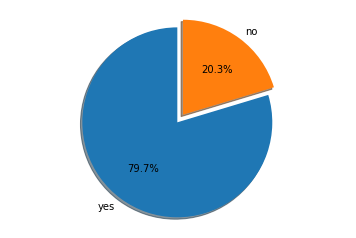

In [16]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
fig1, ax1 = plt.subplots()

ax1.pie(old_partic["partic_old_syst"], explode=[0, 0.1], labels=old_partic.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## How many times did You participate in tenders conducted through the Prozorro?

**UKR: 1. Скільки приблизно разів Ви приймали участь в закупівлях через систему ProZorro?**

In [17]:
# participated into old system
q_2=pd.DataFrame(pd.cut(data["num_participations"][data["old_syst"]==1], 
                            [0, 1, 25, 50, 75, 100,1000000], 
                            right=False).value_counts(sort=False))
q_2.columns=["partic_old_syst"]
q_2["partic_old_syst_perc"]=100*q_2["partic_old_syst"]/sum(q_2["partic_old_syst"])

# didn't participate into old system
q_2["partic_old_syst_not"]=pd.DataFrame(pd.cut(data["num_participations"][data["old_syst"]==0], 
                            [0, 1, 25, 50, 75, 100,1000000], 
                            right=False).value_counts(sort=False))
q_2["partic_old_syst_not_perc"]=100*q_2["partic_old_syst_not"]/sum(q_2["partic_old_syst_not"])

# all
q_2["all"]=q_2["partic_old_syst"]+q_2["partic_old_syst_not"]
q_2["all_perc"]=100*q_2["all"]/sum(q_2["all"])

#Note: here 0 means "many" (when respondent didn't provide the exact or approximate number)
q_2.index=["many", "1-24", "25-49", "50-74", "75-99", "100+"] 

Here is the table with distribution of answers:

In [18]:
q_2

,partic_old_syst,partic_old_syst_perc,partic_old_syst_not,partic_old_syst_not_perc,all,all_perc
many,8,5.673759,0,0.000000,8,4.519774
1-24,56,39.716312,13,36.111111,69,38.983051
25-49,23,16.312057,2,5.555556,25,14.124294
50-74,10,7.092199,6,16.666667,16,9.039548
75-99,2,1.418440,2,5.555556,4,2.259887
100+,42,29.787234,13,36.111111,55,31.073446


Here is the distribution of companies by the number of their participations:

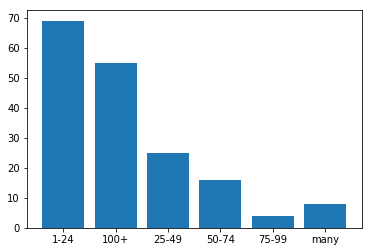

In [19]:
plt.bar(list(q_2.index.astype(str)), list(q_2["all"]))
plt.show()

Here is the distribution of companies by the number of their participations and "experience":

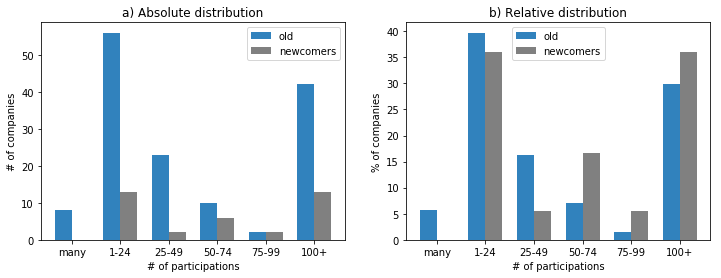

In [20]:
figure_q_2=plt.figure(figsize=(12, 4))

### subplot_1
ax_1 = figure_q_2.add_subplot(121)

width = 0.35       # the width of the bars
rects1 = ax_1.bar(np.arange(len(q_2)), list(q_2["partic_old_syst"]), width, color='#3182bd')
rects2 = ax_1.bar(np.arange(len(q_2)) + width, list(q_2["partic_old_syst_not"]), width, color='gray') #0.35 - width

# add some text for labels, title and axes ticks
ax_1.set_title('a) Absolute distribution')
ax_1.set_ylabel('# of companies')
ax_1.set_xlabel('# of participations')
ax_1.set_xticks(np.arange(len(q_2)) + width / 2)
ax_1.set_xticklabels(list(q_2.index))
ax_1.legend((rects1[0], rects2[0]), ('old', 'newcomers'))


### subplot_2
ax_2 = figure_q_2.add_subplot(122)

width = 0.35       # the width of the bars
rects1 = ax_2.bar(np.arange(len(q_2)), list(q_2["partic_old_syst_perc"]), width, color='#3182bd')
rects2 = ax_2.bar(np.arange(len(q_2)) + width, list(q_2["partic_old_syst_not_perc"]), width, color='gray') #0.35 - width

# add some text for labels, title and axes ticks
ax_2.set_title('b) Relative distribution')
ax_2.set_ylabel('% of companies')
ax_2.set_xlabel('# of participations')
ax_2.set_xticks(np.arange(len(q_2)) + width / 2)
ax_2.set_xticklabels(list(q_2.index))
ax_2.legend((rects1[0], rects2[0]), ('old', 'newcomers'))

plt.show()

According to the survey results, the companies that also participated into previous system, on average, participate more in tender conducted through Prozorro:

In [21]:
q_2_ave=pd.DataFrame(data["num_participations"][data["num_participations"]<9999].groupby(data['old_syst']).mean())

Here is the table with the average number of participations into Prozorro tenders for "experienced" companies and "newcomers":

In [22]:
q_2_ave

,num_participations
old_syst,
0,106.971429
1,121.255319


*(For this analysis we excluded one observation because of probable mistake - one respondent mentioned the number of participations equal to 10000)*

In [23]:
print("As it can be seen from the table, the average number of participations into Prozorro tenders for more experienced companies (participated into previous procurement system) \n \
    is {}, while for newcomers this number s slightly lower {}. But, in order to check where the difference is statistically significant, t-test is needed:" \
      .format(round(q_2_ave.loc[1, "num_participations"], 1), round(q_2_ave.loc[0, "num_participations"], 1)))

As it can be seen from the table, the average number of participations into Prozorro tenders for more experienced companies (participated into previous procurement system) 
     is 121.3, while for newcomers this number s slightly lower 107.0. But, in order to check where the difference is statistically significant, t-test is needed:


In [24]:
from scipy.stats import ttest_ind
ttest_ind(data["num_participations"][data['old_syst']==0][data["num_participations"]<9999], 
          data["num_participations"][data['old_syst']==1][data["num_participations"]<9999])

Ttest_indResult(statistic=-0.28406375294511294, pvalue=0.77669927201210731)

Based on the t-test results, we can't claim that the average number of participations among "experienced" companies is statistically different from the "newcomers'" one.

**CONCLUSION: The fact that the average number of participations for "newcomers" is statistically equal to the average number of participations for "experienced" companies can be explained by the *low entry barrier in Prozorro tenders***

## What were the main reasons behind Your participation in tenders conducted through the Prozorro?

**UKR: 2. Якими були основні причини Вашої участі в закупівлях через систему ProZorro?**

In [25]:
#some cleaning
answers_possible_q_3=["Вимога закону", "Зменшення впливу закупівельника на процес", "Прозорість та доступність даних", 
         "Справедливість", "Доступність/зменшення витрат", "Швидкість"]
data["partic_reasons"]=answer_cleaning(data["partic_reasons"], answers_possible_q_3)

# create the distribution table
q_3=table_answer_summary(data, "partic_reasons")

Here is the table with the main **reasons for participation** in Prozorro system:

In [26]:
q_3

,partic_reasons,num_ment_all,num_ment_old,num_ment_new,num_ment_all_perc,num_ment_old_perc,num_ment_new_perc
0,Вимога закону,96.0,85.0,11.0,54.237288,60.283688,30.555556
1,Прозорість та доступність даних,71.0,53.0,18.0,40.112994,37.588652,50.000000
2,Швидкість,47.0,39.0,8.0,26.553672,27.659574,22.222222
3,Доступність/зменшення витрат,40.0,31.0,9.0,22.598870,21.985816,25.000000
4,Зменшення впливу закупівельника на процес,34.0,24.0,10.0,19.209040,17.021277,27.777778
5,Справедливість,25.0,17.0,8.0,14.124294,12.056738,22.222222
6,other,15.0,11.0,4.0,8.474576,7.801418,11.111111


Here is the Figure based on the table above:

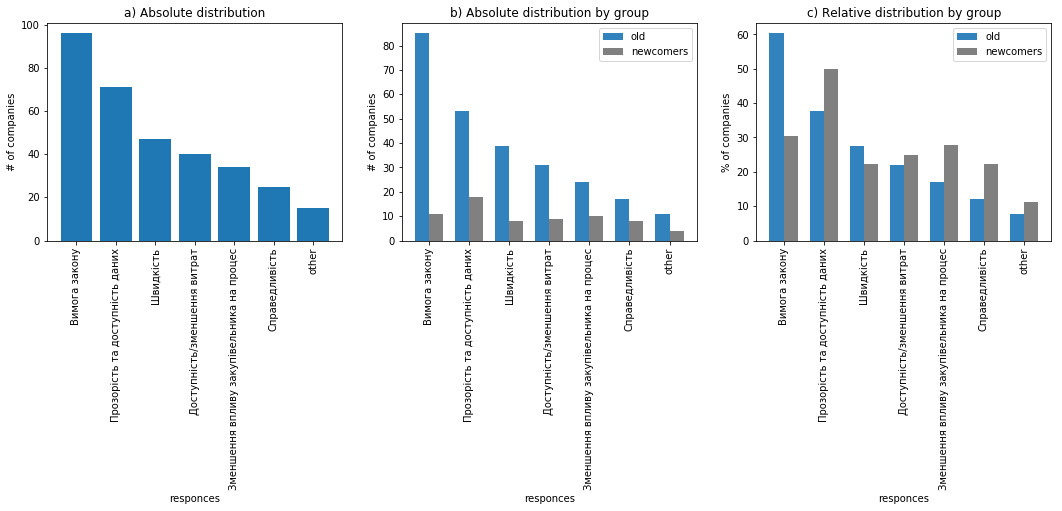

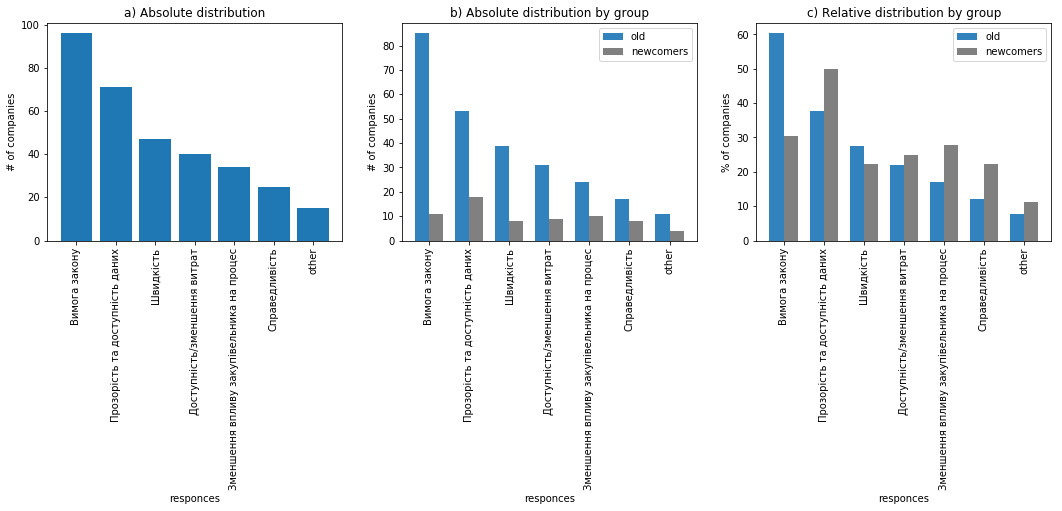

In [27]:
figure_distr_answ_old_new(q_3)

Putting aside the mention requirement of the law, the main reason behind the participation into Prozorro auction is

In [28]:
q_3.loc[q_3["num_ment_new"].idxmax(), "partic_reasons"]

'Прозорість та доступність даних'

It is also interesting to check whether there is the difference between the "experienced" companies and "newcomers" regarding the reasons behind their participation in Prozorro auctions. 
As it can be seen from the figure above, there is difference in reasons behind the participation between "experienced" companies and "newcomers":
- The main reason for "experienced" companies is 

In [29]:
q_3.loc[q_3["num_ment_old"].idxmax(),"partic_reasons"]

'Вимога закону'

- The main reason for "newcomers" is 

In [30]:
q_3.loc[q_3["num_ment_new"].idxmax(),"partic_reasons"]

'Прозорість та доступність даних'

- Other reasons are more or less equally distributed among two groups of companies.

## What types of information on public procurements do You use? 

**UKR: 3. Яку доступну інформацію про закупівлі Ви використовуєте?**

In [31]:
#some cleaning
answers_possible_q_4=["Річні плани закупівель", "Інформація про оголошені закупівлі", "Інформація про ставки учасників на торгах", 
         "Завантажена конкурентом/переможцем документація", "Інформація про ціни на завершених закупівлях", "Контракти"]
data["data_use"]=answer_cleaning(data["data_use"], answers_possible_q_4)

# create the distribution table
q_4=table_answer_summary(data, "data_use")

Here is the table with the main **types of information** used:

In [32]:
q_4

,data_use,num_ment_all,num_ment_old,num_ment_new,num_ment_all_perc,num_ment_old_perc,num_ment_new_perc
0,Інформація про оголошені закупівлі,168.0,134.0,34.0,94.915254,95.035461,94.444444
1,Інформація про ціни на завершених закупівлях,97.0,80.0,17.0,54.802260,56.737589,47.222222
2,Завантажена конкурентом/переможцем документація,94.0,72.0,22.0,53.107345,51.063830,61.111111
3,Інформація про ставки учасників на торгах,76.0,60.0,16.0,42.937853,42.553191,44.444444
4,Контракти,39.0,29.0,10.0,22.033898,20.567376,27.777778
5,Річні плани закупівель,16.0,14.0,2.0,9.039548,9.929078,5.555556
6,other,1.0,1.0,NaN,0.564972,0.709220,NaN


It is also interesting to check whether there is the difference between the "experienced" companies and "newcomers" regarding the data on procurements they use. 

Here is the Figure with the distribution:

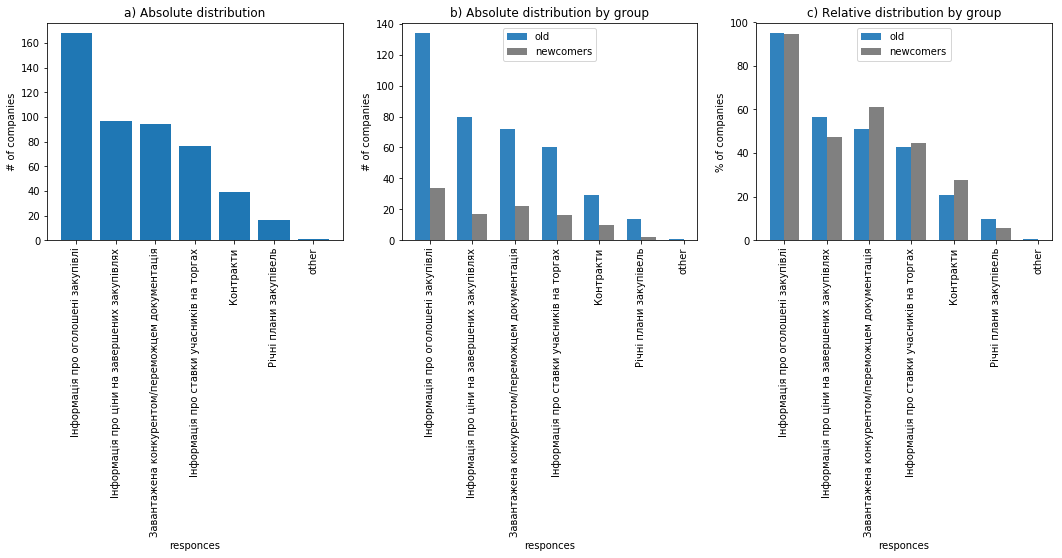

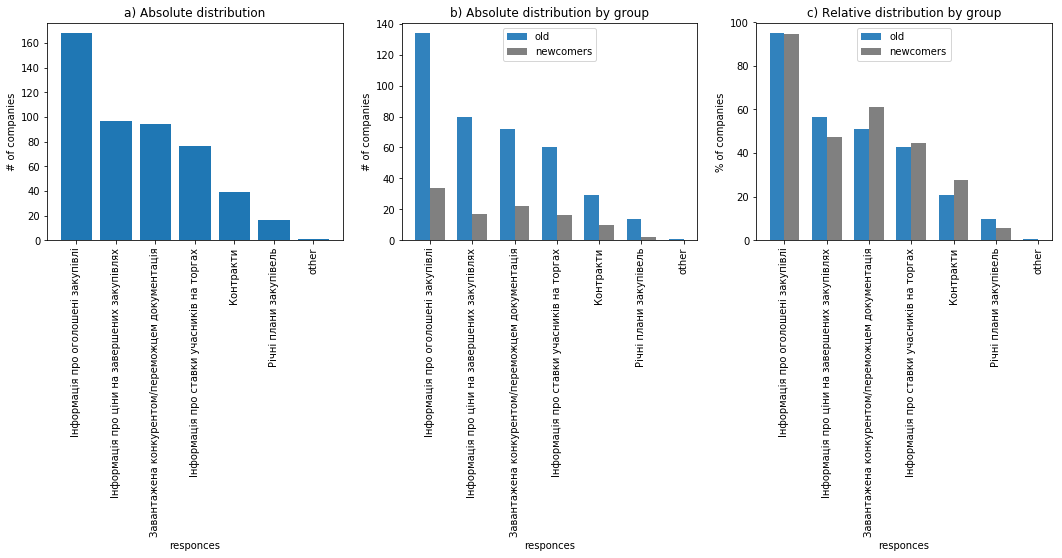

In [33]:
figure_distr_answ_old_new(q_4)

## What are the main sources of information You use?

**UKR: Звідки Ви, в основному, отримуєте інформацію про закупівлі?**

In [34]:
#some cleaning
answers_possible_q_5=["Через власний кабінет на електронній платформі", "Через сайт Prozorro", "В рівній мірі обидва зазначені джерела"]
data["data_source"]=answer_cleaning(data["data_source"], answers_possible_q_5)

# create the distribution table
q_5=table_answer_summary(data, "data_source")

Here is the table with the main **sources of information** used:

In [38]:

q_5

,data_source,num_ment_all,num_ment_old,num_ment_new,num_ment_all_perc,num_ment_old_perc,num_ment_new_perc
0,Через власний кабінет на електронній платформі,103.0,78.0,25.0,58.192090,55.319149,69.444444
1,В рівній мірі обидва зазначені джерела,63.0,54.0,9.0,35.593220,38.297872,25.000000
2,Через сайт Prozorro,32.0,23.0,9.0,18.079096,16.312057,25.000000
3,other,7.0,7.0,NaN,3.954802,4.964539,NaN


Here is the Figure with the distribution:

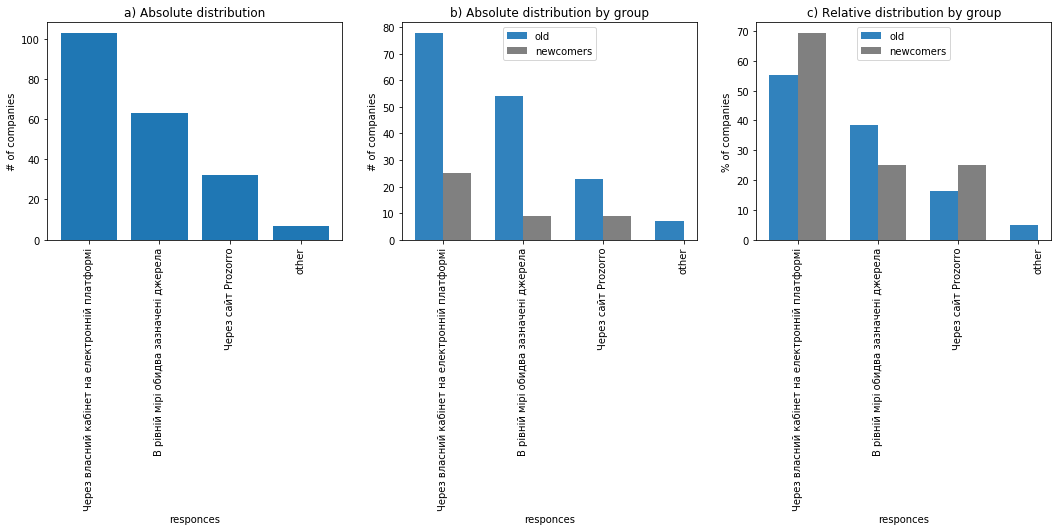

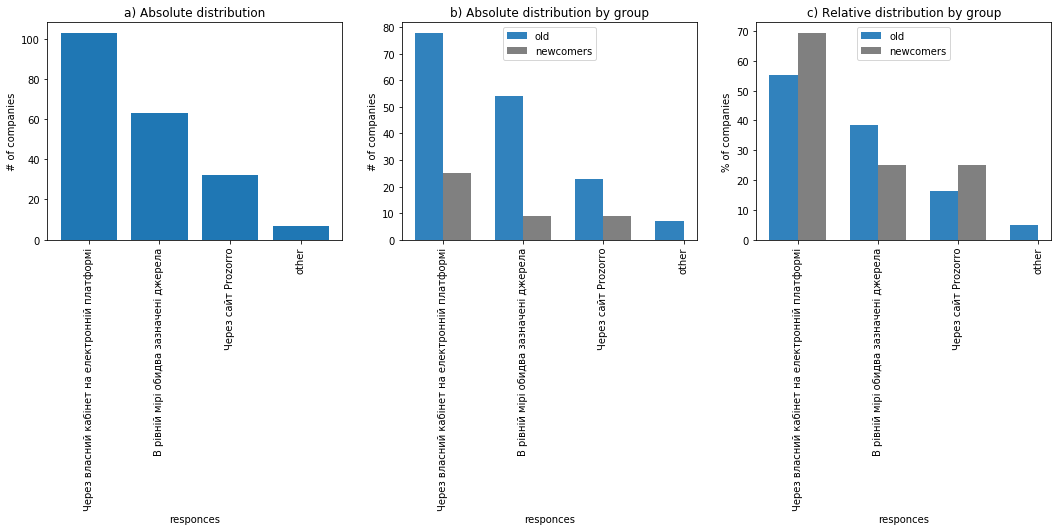

In [36]:
figure_distr_answ_old_new(q_5)

## What is the impact of the data You use? (FINISH LATER)

**UKR: 4. Як використання інформації щодо закупівель вплинуло на діяльність Вашого підприємства?**

In [36]:
#some cleaning
data["data_effect"]=data["data_effect"].apply(str)
answers_possible_q_6=['1. Зменшились адміністративні витрати (якщо так, то в полі "Інше" зазначте 1: на скільки у %)', 
                      '2. Збільшився обсяг реалізації (якщо так, то в полі "Інше" зазначте 2: на скільки у %)', 
                      '3. Заощаджено кошти на проведення дослідження ринку (якщо так, то в полі "Інше" зазначте 3: на скільки у %)',
                      '4. Скорочено час на участь в закупівлях (якщо так, то в полі "Інше" зазначте 4: на скільки у %)',
                      "5. Встановлено нові бізнес-зв'язки",
                      '6. Сприяло збільшенню якості прийнятих рішень',
                      '7. Вдосконалено бізнес-процеси',
                      '8. Не вплинуло взагалі']
data["data_effect"]=answer_cleaning(data["data_effect"], answers_possible_q_6)

# create the distribution table
q_6=table_answer_summary(data, "data_effect")

# additional filter
q_6=q_6[["то в полі" not in effect for effect in q_6["data_effect"]]].reset_index(drop=True)

Here is the table with the main **sources of information** used:

In [37]:
q_6

,data_effect,num_ment_all,num_ment_old,num_ment_new,num_ment_all_perc,num_ment_old_perc,num_ment_new_perc
0,5. Встановлено нові бізнес-зв'язки,77.0,57.0,20.0,43.502825,40.425532,55.555556
1,2. Збільшився обсяг реалізації (якщо так,63.0,46.0,17.0,35.593220,32.624113,47.222222
2,8. Не вплинуло взагалі,35.0,31.0,4.0,19.774011,21.985816,11.111111
3,6. Сприяло збільшенню якості прийнятих рішень,33.0,22.0,11.0,18.644068,15.602837,30.555556
4,4. Скорочено час на участь в закупівлях (якщо так,32.0,30.0,2.0,18.079096,21.276596,5.555556
5,7. Вдосконалено бізнес-процеси,30.0,22.0,8.0,16.949153,15.602837,22.222222
6,other,16.0,15.0,1.0,9.039548,10.638298,2.777778
7,1. Зменшились адміністративні витрати (якщо так,11.0,10.0,1.0,6.214689,7.092199,2.777778
8,3. Заощаджено кошти на проведення дослідження ...,10.0,8.0,2.0,5.649718,5.673759,5.555556


**NOTE! There is huge difference between types of companies regarding the data impact. Out of 35 companies that are not affected by data use, 31 of them are experienced companies**. 

Here is the Figure with the distribution:

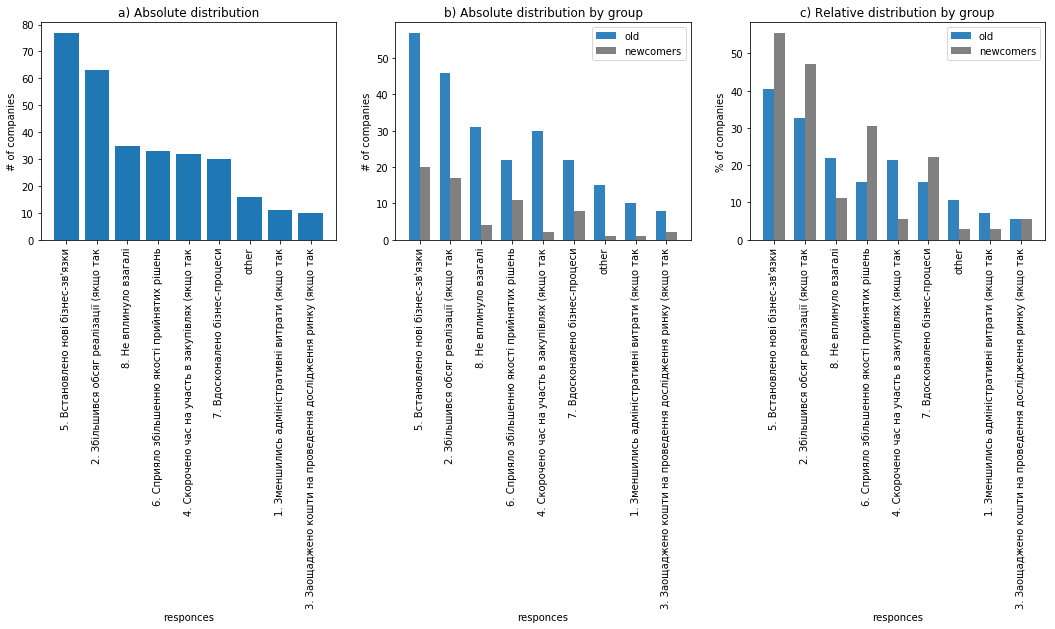

In [38]:
figure_distr_answ_old_new(q_6)

**ADDITIONAL INFORMATION**

Here are the answers on the **size of the effect**:

In [39]:
pd.DataFrame(data["data_effect_ext"].drop_duplicates())

,data_effect_ext
0,
5,2: 20%
8,снизился объем реализации
12,2: 10%
13,2: 5%
16,адміністративні витрати збільшились
21,Все разом
24,2: 200%
32,4: 50%
36,"1: 10 разів, 2: 2000%, 4: 10 (разів(?))"


In [40]:
data_effect_size = pd.DataFrame(data["data_effect_ext"]
                                [data["data_effect_ext"].str[0].isin(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])])
data_effect_size = data_effect_size["data_effect_ext"].str.split(", ", expand=True)
data_effect_size=pd.DataFrame(data_effect_size[0].append(data_effect_size[1])
                                     .append(data_effect_size[2])
                                     .dropna())
data_effect_size["question"] = data_effect_size[0].str[0].apply(int)
data_effect_size["answer"] = data_effect_size[0].str.split(": ").str[1]


data_effect_size_dict = {}
for i in range(1, 5):
    data_temp = data_effect_size[data_effect_size["question"]==i]
    data_effect_size_dict[i]=list(data_temp["answer"])

data_effect_size_distr = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in data_effect_size_dict.items() ])).fillna("")

Here is the distribution of answers on **size of the effect** by question:

In [41]:
data_effect_size_distr

,1,2,3,4
0,10 разів,20%,?,50%
1,,20%,,80%
2,,10%,,4 (разів(&))
3,,5%,,30%
4,,200%,,20%
5,,100%,,5%
6,,10%,,10%
7,,60%,,10 (разів(?))
8,,30%,,50%
9,,5%,,


## Which additional information on procurements You need?

**UKR: 5. Яка додаткова інформація щодо закупівель була би Вам корисна?**

Here are the respondents' **demand for additional information**:

In [42]:
[info for info in data["demand_add_info"] if info!=""]

['Информации вполне достаточно',
 '-',
 'никакая',
 'Інформації достатньо, бажано змінити форму надання інформації',
 'Більш чітка та компетентна тендерна документація замовників.',
 'ВСЯ ІНФОРМАЦІЯ МЕНЕ ВЛАШТОВУЄ',
 'архив',
 'Дані замовника про кількість оголошених замовлень та підписаних договорів із виконавцем. Своєрідний рейтинг замовмика',
 'хватает той, что есть',
 '-',
 'плани замовників',
 'Вся потрібна  інформація є в наявності',
 'Інформації досить.',
 'Аналіз в розрізі предмету закупівлі та постачальника',
 'інформації достатньо, корупції багато',
 'не потрібно , все і так зрозуміло',
 'інформація щодо звернень про порушення в ході закупівлі в профільні міністерства,  антикорупційні відділи',
 'Технічні умови',
 'не можу відповісти',
 'Статистика покараних, і притягнутих до відповідальності замовників за недотримання законів, правил ProZorro. Чорний список замовників та учасників.',
 'все влаштовує',
 'Сиатистика',
 'Список всіх скарг, що були висунуті замовнику за попердні

## Which additional information on procurements You need?

**UKR: 6. Чи проводиться на Вашому підприємстві моніторинг даних про закупівлі?**

   **Якщо так, то чого саме стосується цей моніторинг?**

In [43]:
# some cleaning (first part)
answers_possible_q_8_1=["Так, регулярно",
                        "Так, час від часу", 
                        "Ні"]
data["monitoring"]=answer_cleaning(data["monitoring"], answers_possible_q_8_1)

# create the distribution table (first part)
q_8_1=table_answer_summary(data, "monitoring")
q_8_1=q_8_1.drop(q_8_1.index[0]).reset_index(drop=True)

#some cleaning (second part)
data["add_monitoring_target"]=data["add_monitoring_target"].astype(str)
answers_possible_q_8_2=["Окремих секторів", 
                        "Конкурентів", 
                        "Організаторів закупівель"]
data["add_monitoring_target"]=answer_cleaning(data["add_monitoring_target"], answers_possible_q_8_2)

# create the distribution table (second part)
q_8_2=table_answer_summary(data, "add_monitoring_target")


Here is the table with data on **monitoring frequency**:

In [44]:
q_8_1

,monitoring,num_ment_all,num_ment_old,num_ment_new,num_ment_all_perc,num_ment_old_perc,num_ment_new_perc
0,регулярно,102.0,83.0,19.0,57.627119,58.865248,52.777778
1,час від часу,61.0,47.0,14.0,34.463277,33.333333,38.888889
2,Ні,14.0,11.0,3.0,7.909605,7.801418,8.333333


Here is the Figure with the distribution:

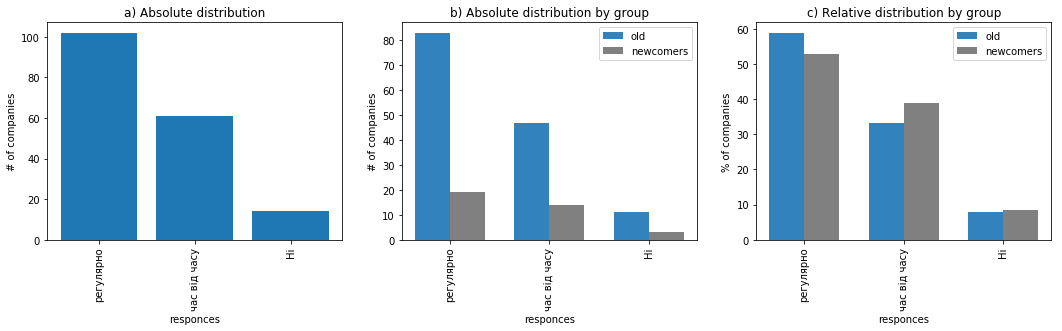

In [45]:
figure_distr_answ_old_new(q_8_1)

Here is the table with data on **monitoring target**:

In [46]:
q_8_2

,add_monitoring_target,num_ment_all,num_ment_old,num_ment_new,num_ment_all_perc,num_ment_old_perc,num_ment_new_perc
0,Окремих секторів,104.0,81.0,23.0,58.757062,57.446809,63.888889
1,Конкурентів,100.0,78.0,22.0,56.497175,55.319149,61.111111
2,Організаторів закупівель,77.0,59.0,18.0,43.502825,41.843972,50.000000
3,other,9.0,8.0,1.0,5.084746,5.673759,2.777778


**[LOOK AT "OTHER" IN EXPERIENCED COMPANIES]. Probably, something interest is there**

Here is the Figure with the distribution:

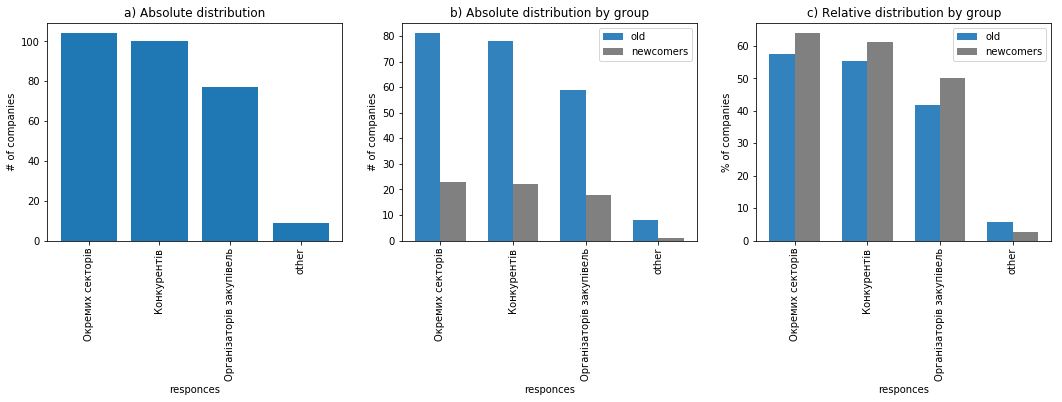

In [47]:
figure_distr_answ_old_new(q_8_2)

## Do You have separate person that collects and processes data on procurements?

**UKR: 7. Чи було виділено на Вашому підприємстві працівника, до обов'язків якого належить збір та обробка даних з ProZorro?**

In [48]:
#some cleaning
answers_possible_q_9=["Так, він/вона займається цим повний робочий день", 
                      "Так, він/вона займається цим НЕповний робочий день", 
                      "Ні"]
data["data_separ_pers"]=answer_cleaning(data["data_separ_pers"], answers_possible_q_9)

# create the distribution table
q_9=table_answer_summary(data, "data_separ_pers")
q_9=q_9.drop(q_9.index[0]).reset_index(drop=True)

Here is the table with data on **separate data person**:

In [49]:
q_9

,data_separ_pers,num_ment_all,num_ment_old,num_ment_new,num_ment_all_perc,num_ment_old_perc,num_ment_new_perc
0,він/вона займається цим НЕповний робочий день,68.0,56.0,12.0,38.418079,39.716312,33.333333
1,Ні,58.0,46.0,12.0,32.768362,32.624113,33.333333
2,він/вона займається цим повний робочий день,41.0,33.0,8.0,23.163842,23.404255,22.222222
3,other,10.0,6.0,4.0,5.649718,4.255319,11.111111


Here is the Figure with the distribution:

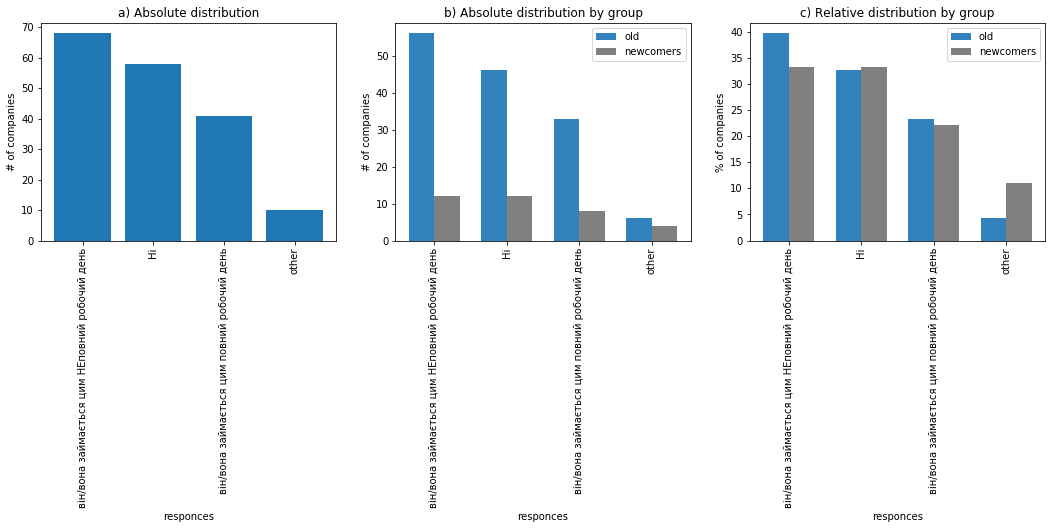

In [50]:
figure_distr_answ_old_new(q_9)

## Do You use procurement entities' annual procurement plans?

**UKR: 8. Чи використовуєте Ви в своїй діяльності річні плани закупівель, які публікуються замовниками?**

In [51]:
#some cleaning
answers_possible_q_10=["Так, для пошуку нових клієнтів", 
                      "Так, для розподілу ресурсів на участь в закупівлях", 
                      "Так, для врахування у власних планах",
                      "Не використовуємо"]
data["annual_plans_use"]=answer_cleaning(data["annual_plans_use"], answers_possible_q_10)

# create the distribution table
q_10=table_answer_summary(data, "annual_plans_use")
q_10=q_10.drop(q_10.index[1]).reset_index(drop=True)
#q_10=q_10.drop(q_10[q_10.columns[0]]=="Так").reset_index(drop=True)

Here is the table with data on **annual plans use**:

In [52]:
q_10

,annual_plans_use,num_ment_all,num_ment_old,num_ment_new,num_ment_all_perc,num_ment_old_perc,num_ment_new_perc
0,Не використовуємо,134.0,103.0,31.0,75.706215,73.049645,86.111111
1,для врахування у власних планах,27.0,25.0,2.0,15.254237,17.730496,5.555556
2,для пошуку нових клієнтів,16.0,11.0,5.0,9.039548,7.801418,13.888889
3,для розподілу ресурсів на участь в закупівлях,10.0,9.0,1.0,5.649718,6.382979,2.777778
4,other,4.0,4.0,NaN,2.259887,2.836879,NaN


Here is the Figure with the distribution:

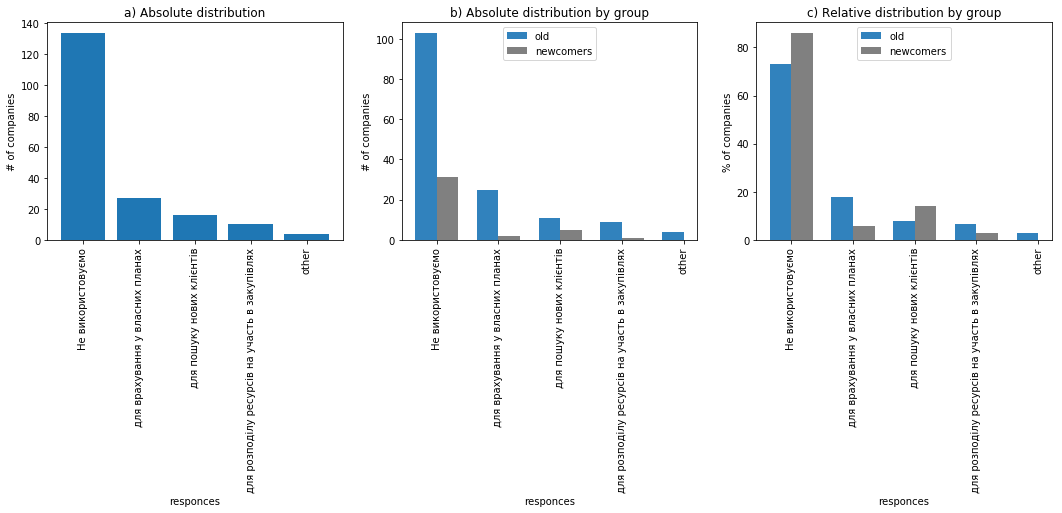

In [53]:
figure_distr_answ_old_new(q_10)

## Are You going to use procurement entities' annual procurement plans if the will have higher quality?

**UKR: 9. Чи плануєте Ви використовувати річні плани закупівель, якщо вони вони будуть "більшої якості" (точнішими, більш стабільними тощо)?**

In [54]:
#some cleaning
answers_possible_q_11=["Так", 
                      "Ні"]
data["annual_plans_use_future"]=answer_cleaning(data["annual_plans_use_future"], answers_possible_q_11)

# create the distribution table
q_11=table_answer_summary(data, "annual_plans_use_future")

Here is the table with data on **annual plans use in the future**:

In [55]:
q_11

,annual_plans_use_future,num_ment_all,num_ment_old,num_ment_new,num_ment_all_perc,num_ment_old_perc,num_ment_new_perc
0,Так,124.0,100.0,24.0,70.056497,70.921986,66.666667
1,Ні,47.0,38.0,9.0,26.553672,26.950355,25.000000
2,other,6.0,3.0,3.0,3.389831,2.127660,8.333333


Here is the Figure with the distribution:

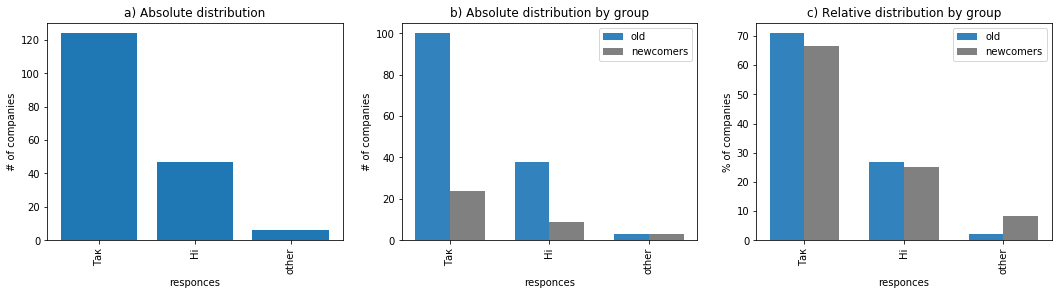

In [56]:
figure_distr_answ_old_new(q_11)

## Is You activity expanded on other regions, sectors or entities because of data use?

**UKR: 10. Чи використання даних щодо закупівель сприяло розширенню участі Вашого підприємства у закупівлях в  інших регіонах, секторах, організаціях?**

In [57]:
#some cleaning
answers_possible_q_12=["Так, в інших регіонах", 
                      "Так, в інших секторах",
                      "Так, в інших організаціях",
                      "Ні"]
data["partic_reg_expant"]=answer_cleaning(data["partic_reg_expant"], answers_possible_q_12)

# create the distribution table
q_12=table_answer_summary(data, "partic_reg_expant")
q_12=q_12.drop(q_12.index[0]).reset_index(drop=True)
#q_12=q_12.drop(q_12[q_12.columns[0]]=="Так").reset_index(drop=True)

Here is the table with data on **activity's expansion**:

In [58]:
q_12

,partic_reg_expant,num_ment_all,num_ment_old,num_ment_new,num_ment_all_perc,num_ment_old_perc,num_ment_new_perc
0,в інших регіонах,102.0,75.0,27.0,57.627119,53.191489,75.000000
1,в інших організаціях,64.0,56.0,8.0,36.158192,39.716312,22.222222
2,Ні,29.0,21.0,8.0,16.384181,14.893617,22.222222
3,в інших секторах,29.0,21.0,8.0,16.384181,14.893617,22.222222
4,other,13.0,12.0,1.0,7.344633,8.510638,2.777778


**[LOOK AT "OTHER" IN EXPERIENCED COMPANIES]. Probably, something interest is there**

Here is the Figure with the distribution:

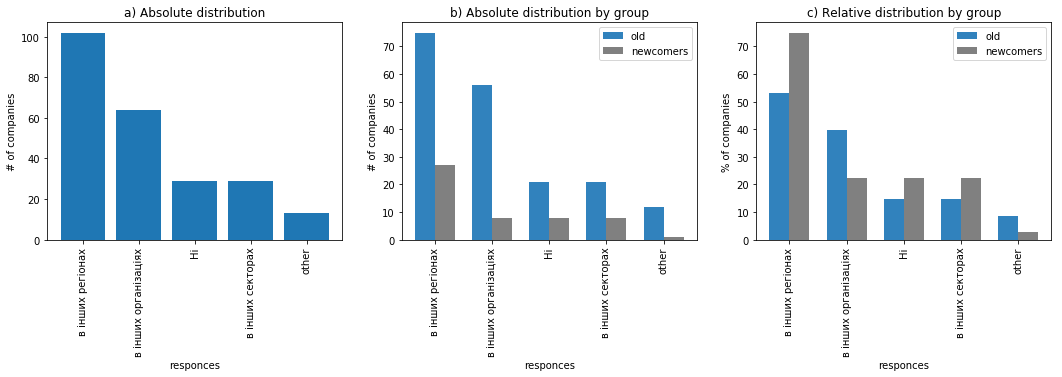

In [59]:
figure_distr_answ_old_new(q_12)

## Do You use such instruments as questions, claims and complaints?

**UKR: 11. Чи використовується на Вашому підприємстві можливості доступу до питань/відповідей, вимог та скарг, які стосуються окремих лотів?**

In [60]:
#some cleaning
answers_possible_q_13=["Так, задаємо питання чи формуємо вимоги/скарги", 
                       "Так, ознайомлюємося з відповідями на питання чи вимоги/скарги, залишеними іншими учасниками",
                       "Важливо",
                       "Не важливо",
                       "Ні"]
data["claim_compl_use"]=answer_cleaning(data["claim_compl_use"], answers_possible_q_13)

# create the distribution table
q_13=table_answer_summary(data, "claim_compl_use")
q_13=q_13.drop(q_13.index[0]).reset_index(drop=True)
q_13=q_13.drop(q_13.index[2]).reset_index(drop=True)
#q_13=q_13.drop(q_13[q_13.columns[0]]=="Так").reset_index(drop=True)

Here is the table with data on **using questions, claims, complaints**:

In [61]:
q_13

,claim_compl_use,num_ment_all,num_ment_old,num_ment_new,num_ment_all_perc,num_ment_old_perc,num_ment_new_perc
0,задаємо питання чи формуємо вимоги/скарги,79.0,60.0,19.0,44.632768,42.553191,52.777778
1,Важливо,49.0,44.0,5.0,27.683616,31.205674,13.888889
2,ознайомлюємося з відповідями на питання чи вим...,21.0,14.0,7.0,11.864407,9.929078,19.444444
3,Не важливо,11.0,9.0,2.0,6.214689,6.382979,5.555556
4,Ні,11.0,9.0,2.0,6.214689,6.382979,5.555556
5,other,6.0,5.0,1.0,3.389831,3.546099,2.777778


**[LOOK AT "OTHER" IN EXPERIENCED COMPANIES]. Probably, something interest is there**

Here is the Figure with the distribution:

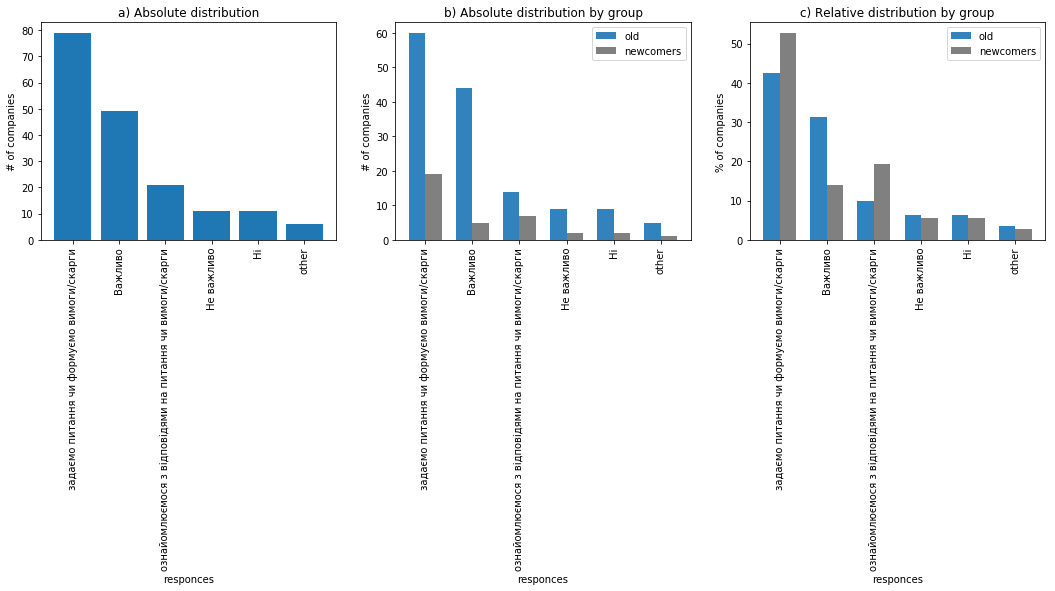

In [62]:
figure_distr_answ_old_new(q_13)

## Do You monitor other companies' bids?

**UKR: 12. Чи проводите Ви моніторинг ставок, які роблять інші учасники, в т. ч.  Ваші конкуренти?**

In [63]:
#some cleaning
answers_possible_q_14=["Так, систематично", 
                       "Так, час від часу",
                       "Ні"]
data["competitors_monitoring"]=answer_cleaning(data["competitors_monitoring"], answers_possible_q_14)

# create the distribution table
q_14=table_answer_summary(data, "competitors_monitoring")
q_14=q_14.drop(q_14.index[0]).reset_index(drop=True)
#q_14=q_14.drop(q_14[q_14.columns[0]]=="Так").reset_index(drop=True)

Here is the table with data on **monitoring of other companies**:

In [64]:
q_14

,competitors_monitoring,num_ment_all,num_ment_old,num_ment_new,num_ment_all_perc,num_ment_old_perc,num_ment_new_perc
0,час від часу,84.0,70.0,14.0,47.457627,49.645390,38.888889
1,систематично,70.0,55.0,15.0,39.548023,39.007092,41.666667
2,Ні,22.0,15.0,7.0,12.429379,10.638298,19.444444
3,other,1.0,1.0,NaN,0.564972,0.709220,NaN


Here is the Figure with the distribution:

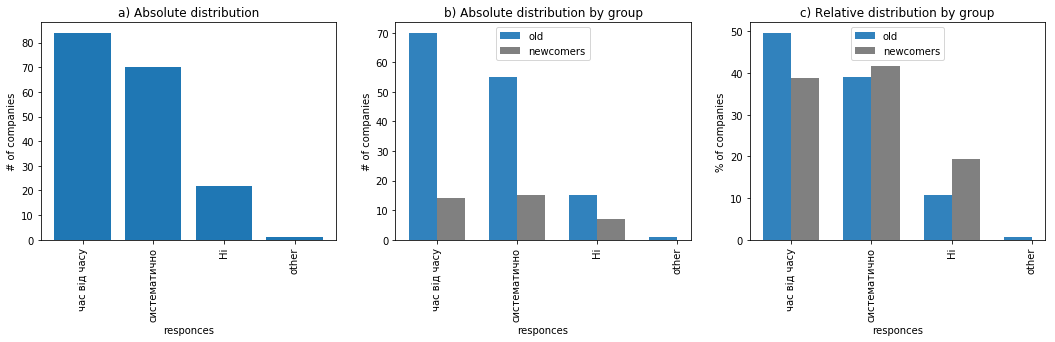

In [65]:
figure_distr_answ_old_new(q_14)

## Do You prepare "black" or "white" lists of procurement entities?

**UKR: 13. Чи складають на Вашому підприємстві перелік організаторів закупівель, базуючись на даних ProZorro/Dozorro?**

In [66]:
#some cleaning
answers_possible_q_15=["Так, перелік ненадійних закупівельників", 
                       "Так, перелік надійних закупівельників",
                       "Ні"]
data["list_proc_ent"]=answer_cleaning(data["list_proc_ent"], answers_possible_q_15)

# create the distribution table
q_15=table_answer_summary(data, "list_proc_ent")
q_15=q_15.drop(q_15.index[1]).reset_index(drop=True)


Here is the table with data on **monitoring of other companies**:

In [67]:
q_15

,list_proc_ent,num_ment_all,num_ment_old,num_ment_new,num_ment_all_perc,num_ment_old_perc,num_ment_new_perc
0,Ні,129.0,103.0,26.0,72.881356,73.049645,72.222222
1,перелік надійних закупівельників,27.0,20.0,7.0,15.254237,14.184397,19.444444
2,перелік ненадійних закупівельників,23.0,18.0,5.0,12.994350,12.765957,13.888889
3,other,13.0,12.0,1.0,7.344633,8.510638,2.777778


**[LOOK AT "OTHER" IN EXPERIENCED COMPANIES]. Probably, something interest is there**

Here is the Figure with the distribution:

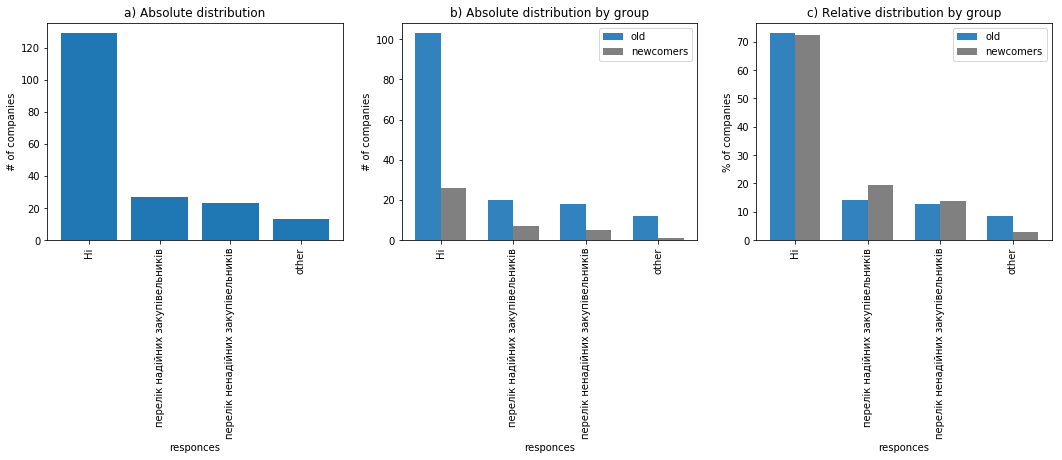

In [68]:
figure_distr_answ_old_new(q_15)

## Do You use comments left on Dozorro?

**UKR: 14. Чи використовуєте Ви коментарі, які залишають на порталі Dozorro?**

In [69]:
#some cleaning
answers_possible_q_16=["Так",
                       "Ні"]
data["comments_dozorro_use"]=answer_cleaning(data["comments_dozorro_use"], answers_possible_q_16)

# create the distribution table
q_16=table_answer_summary(data, "comments_dozorro_use")
#q_16=q_16.drop(q_16.index[0]).reset_index(drop=True)


Here is the table with data on **monitoring of other companies**:

In [70]:
q_16

,comments_dozorro_use,num_ment_all,num_ment_old,num_ment_new,num_ment_all_perc,num_ment_old_perc,num_ment_new_perc
0,Ні,97.0,75.0,22.0,54.802260,53.191489,61.111111
1,Так,70.0,57.0,13.0,39.548023,40.425532,36.111111
2,other,10.0,9.0,1.0,5.649718,6.382979,2.777778


**[LOOK AT "OTHER" IN EXPERIENCED COMPANIES]. Probably, something interest is there**

Here is the Figure with the distribution:

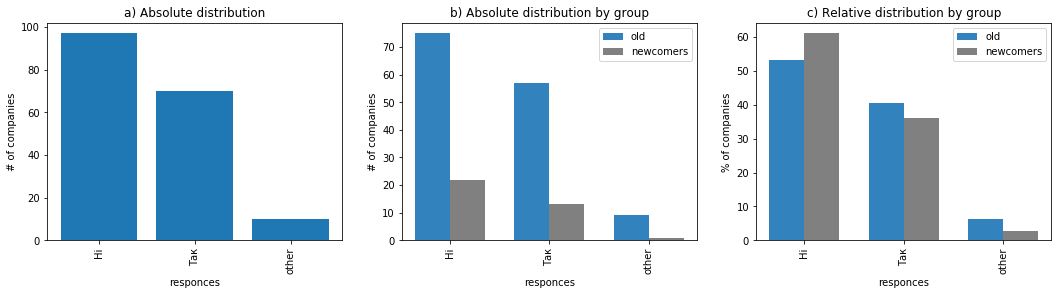

In [71]:
figure_distr_answ_old_new(q_16)

## Final comments

Here are the respondents' **final comments**:

In [72]:
[comment for comment in data["final_comments"] if comment!=""]

['Единственный плюс электронных площадок, это небольшое сокращение времени на участие. ',
 'Основні недоліки:    1. Не ефективна процедура проведення аукціону "Прозоро";     2. Диктат замовників та безправність учасників закупівлі.   ',
 'за допомогою Прозорррро Україну завалять мотлохом, низкопробними товарами... Ми на це з жахом дивимось вже рік! Якість шкільного обладнання впала на дно. Наслідки будуть дорого коштувати',
 'Прозоро, не завжди прозоро',
 'Основним викликом при закупівлі фармацевтичної продукції - є  штучні обмеження кількості учасників. Це досягається: об"єднання декількох лікарських засобів в 1 лот, додаткові технічні умови (наявність відгуку про використання від конкретної лікарні, закупівля ліків лише в формі ампул - пропозицію в флаконах буде відхидено, тощо).',
 'очень часто заказчик чтобы протянуть своего исполнителя абсолютно необосновано дисквалифицируют победителей. невзирая на очень существенную разницу в цене .требуют множество дублирующих документов и спра